In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.0.0-rc1
2.2.4-tf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [5]:
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [8]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.4761 - accuracy: 0.7761 - val_loss: 0.3871 - val_accuracy: 0.8108
Epoch 2/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3862 - accuracy: 0.8083 - val_loss: 0.3812 - val_accuracy: 0.8055
Epoch 3/100
30162/30162 [==============================] - 2s 51us/step - loss: 0.3754 - accuracy: 0.8134 - val_loss: 0.3770 - val_accuracy: 0.8155
Epoch 4/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3718 - accuracy: 0.8134 - val_loss: 0.3654 - val_accuracy: 0.8177
Epoch 5/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3723 - accuracy: 0.8116 - val_loss: 0.3715 - val_accuracy: 0.8168
Epoch 6/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3708 - accuracy: 0.8133 - val_loss: 0.3650 - val_accuracy: 0.8159
Epoch 7/100
30162/30162 [==============================] - 1s 

Epoch 56/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3570 - accuracy: 0.8181 - val_loss: 0.3664 - val_accuracy: 0.8164
Epoch 57/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3567 - accuracy: 0.8202 - val_loss: 0.3724 - val_accuracy: 0.8053
Epoch 58/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3561 - accuracy: 0.8190 - val_loss: 0.3648 - val_accuracy: 0.8172
Epoch 59/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3553 - accuracy: 0.8192 - val_loss: 0.3617 - val_accuracy: 0.8173
Epoch 60/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3555 - accuracy: 0.8223 - val_loss: 0.3626 - val_accuracy: 0.8185
Epoch 61/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3547 - accuracy: 0.8198 - val_loss: 0.3691 - val_accuracy: 0.8124
Epoch 62/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3561 - accuracy: 0.8200

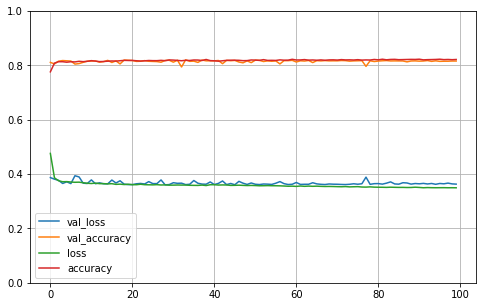

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 16us/step


[0.36299147292437306, 0.8158698678016663]

In [13]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

0.8158698539176626

# Zad

Wczytaj nauczony model

In [14]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 15us/step


[0.36044085541886006, 0.818061113357544]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku